In [1]:
%matplotlib inline

import numpy as np
import cProfile
import random
from SNN_test import *
from NN import *
from WAVreader import *
from copy import deepcopy
from random import shuffle
from scipy.io import wavfile
from scipy.fftpack import fft, dct
from pylab import *
from numpy import dot, outer
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

In [2]:
filelist = ['Audio/1-1.wav',
            'Audio/1-2.wav',
            'Audio/2-1.wav',
            'Audio/2-2.wav',
            'Audio/3-1.wav',
            'Audio/3-2.wav',
            'Audio/4-1.wav',
            'Audio/4-2.wav',
            'Audio/5-1.wav',
            'Audio/5-2.wav',
            'Audio/6-1.wav',
            'Audio/6-2.wav',
            'Audio/7-1.wav',
            'Audio/7-2.wav',
            
            ]
info = WAVreader(filelist, [0,0,1,1,2,2,3,3,4,4,5,5,6,6], 0.05)
data = info.dataset

14.4615
Scaled 1005 windows down to 751
Finished file Audio/1-1.wav
14.603
Scaled 1013 windows down to 763
Finished file Audio/1-2.wav
14.6035
Scaled 883 windows down to 756
Finished file Audio/2-1.wav
14.1525
Scaled 895 windows down to 789
Finished file Audio/2-2.wav
14.5955
Scaled 1285 windows down to 1004
Finished file Audio/3-1.wav
14.6025
Scaled 1176 windows down to 985
Finished file Audio/3-2.wav
14.6025
Scaled 806 windows down to 651
Finished file Audio/4-1.wav
13.49
Scaled 1574 windows down to 1159
Finished file Audio/4-2.wav
14.598
Scaled 891 windows down to 759
Finished file Audio/5-1.wav
14.601
Scaled 1504 windows down to 1161
Finished file Audio/5-2.wav
14.6035
Scaled 963 windows down to 821
Finished file Audio/6-1.wav
14.6025
Scaled 1321 windows down to 1081
Finished file Audio/6-2.wav
14.596
Scaled 1265 windows down to 1013
Finished file Audio/7-1.wav
14.596
Scaled 2184 windows down to 1721
Finished file Audio/7-2.wav

Final data set consists of 13358 windows over 7 class

In [3]:
trainset = []
testset = []
for i in xrange(len(data)):
    if i%10 < 3: testset.append(data[i])
    else: trainset.append(data[i])
print (len(data), len(testset))

(13358, 4008)


In [9]:
SNN = SoftmaxNeuralNetwork(input_dim=79, output_dim=info.numClasses)
# print data[0][1]
# SNN.forward_propagation(data[0][0])
# print SNN.predictions
# SNN.backward_propagation(data[0][1])
SNN.train(trainset, maxiter=201, display_progress=True, anneal=lambda x: .01/(100+5*x*info.numClasses))

completed iteration 0; error is 7908.0; size is 0.174105898127
completed iteration 10; error is 6826.0; size is 0.197552239415
completed iteration 20; error is 6339.0; size is 0.197048592013
completed iteration 30; error is 6156.0; size is 0.195731511006
completed iteration 40; error is 5961.0; size is 0.194335744864
completed iteration 50; error is 5902.0; size is 0.19303428602
completed iteration 60; error is 5748.0; size is 0.191925981974
completed iteration 70; error is 5639.0; size is 0.191004175488
completed iteration 80; error is 5600.0; size is 0.190183873348
completed iteration 90; error is 5535.0; size is 0.189478466447
completed iteration 100; error is 5452.0; size is 0.188877176789
completed iteration 110; error is 5418.0; size is 0.188305437536
completed iteration 120; error is 5458.0; size is 0.187771227427
completed iteration 130; error is 5420.0; size is 0.187310828158
completed iteration 140; error is 5326.0; size is 0.186911327224
completed iteration 150; error is 531

In [10]:
# 2-class, alpha=.001, lmbda=.0001, t=101
print SNN.accuracy(trainset), SNN.accuracy(testset)

0.463743315508 0.438123752495


Confusion matrix
[[300   2  42  25   0  75   9]
 [ 25  11 158  46  16 142  64]
 [ 24   3 402  27   1  97  40]
 [  4   2 124 201  26 114  69]
 [ 13   0  78 121  96  71 194]
 [ 25   1 109  39   4 344  47]
 [ 31   2 154  68  29 131 402]]


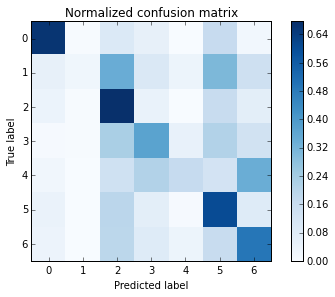

In [11]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

ytrue = []
ypred = []
for clip in testset:
    SNN.forward_propagation(clip[0])
    ypred.append(np.argmax(SNN.predictions))
    ytrue.append(np.argmax(clip[1]))
confusion=confusion_matrix(ytrue, ypred)
cm_normalized = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]
print('Confusion matrix')
print(confusion)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

In [12]:
precisions = np.array([(confusion[i][i]+0.0)/np.sum(confusion, axis=0)[i] for i in range(info.numClasses)])
meanp = np.mean(precisions)
recalls = np.array([(confusion[i][i]+0.0)/sum(confusion[i]) for i in range(info.numClasses)])
meanr = np.mean(recalls)
F1 = 2*meanr*meanp/(meanr+meanp)
print meanp
print meanr
print F1

0.484495207053
0.428457689875
0.454756642688


IndexError: list index out of range

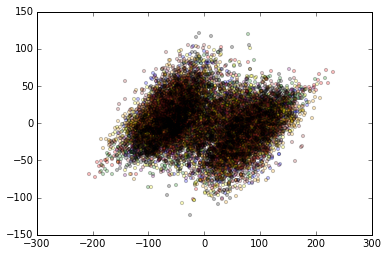

In [13]:
colors = ['red','blue','green','purple','orange','yellow','brown','black']

pull = info.concatset
X = [dat[0] for dat in pull]
labels = [(dat[1]+0.0)/info.length*2 for dat in info.concatset]
pca = PCA(n_components=2)
pca.fit(X)
newX = pca.transform(X)
figure()
for label in range(info.numClasses):
    series = [newX[i] for i in range(len(newX)) if pull[i][1]==label]
    scatter([x[0] for x in series], [x[1] for x in series],c=colors[label],alpha=0.25,s=10)
show()

In [ ]:
#SIMPLE TIMER
cProfile.run("rate, x = wavfile.read('5-1.wav');")
print rate, len(x)

         34665 function calls (34281 primitive calls) in 0.040 seconds

   Random listing order was used

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 transforms.py:999(_get_minposy)
       10    0.000    0.000    0.000    0.000 cbook.py:363(__init__)
        1    0.000    0.000    0.000    0.000 figure.py:99(bubble)
      197    0.000    0.000    0.000    0.000 {method 'itervalues' of 'dict' objects}
       20    0.000    0.000    0.000    0.000 artist.py:261(get_transform)
       16    0.000    0.000    0.000    0.000 ticker.py:390(__init__)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:53(take)
    81/78    0.000    0.000    0.000    0.000 {hash}
       10    0.000    0.000    0.000    0.000 cbook.py:495(connect)
       95    0.000    0.000    0.000    0.000 text.py:1020(set_text)
        2    0.000    0.000    0.000    0.000 lines.py:542(set_axes)
      3/2    0.000    0.000    0.000    0.000 tr

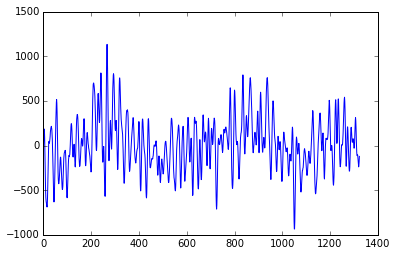

In [28]:
#MORE COMPLEX TIMER - BUT POSSIBLY CAN EXTRACT INFO INTO VARIABLES
import cProfile, pstats, StringIO
pr = cProfile.Profile()
pr.enable()
pr.run("rate, x = wavfile.read('5-1.wav');")
pr.disable()
s = StringIO.StringIO()
ps = pstats.Stats(pr, stream=s).strip_dirs()
ps.print_stats()
print s.getvalue()